## Calculating the Return of Indices

In [1]:
from datetime import datetime

import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import yfinance as yf

yf.pdr_override()

import matplotlib.pyplot as plt

In [2]:
tickers = {'S&P500': '^GSPC', 'NASDAQ': '^IXIC', 'German DAX': '^GDAXI', 'London FTSE': '^FTSE'}

ind_data = pd.DataFrame()

for k, v in tickers.items():
    ind_data[v] = wb.get_data_yahoo(v, datetime(1997, 1, 1))['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
ind_data.head()

,^GSPC,^IXIC,^GDAXI,^FTSE
Date,,,,
1997-01-02,737.010010,1280.699951,2820.810059,4057.399902
1997-01-03,748.030029,1310.680054,2863.260010,4089.500000
1997-01-06,747.650024,1316.400024,2890.199951,4106.500000
1997-01-07,753.229980,1327.729980,2876.340088,4078.800049
1997-01-08,748.409973,1320.349976,2904.080078,4087.500000


In [4]:
ind_data.tail()

,^GSPC,^IXIC,^GDAXI,^FTSE
Date,,,,
2023-03-06,4048.419922,11675.740234,15653.580078,7929.799805
2023-03-07,3986.370117,11530.330078,15559.530273,7919.500000
2023-03-08,3992.010010,11576.000000,15631.870117,7929.899902
2023-03-09,3918.320068,11338.349609,15633.209961,7880.000000
2023-03-10,3861.590088,11138.889648,15427.969727,7748.399902


### Visualize index close price

**Normalize to 100**

<Axes: xlabel='Date'>

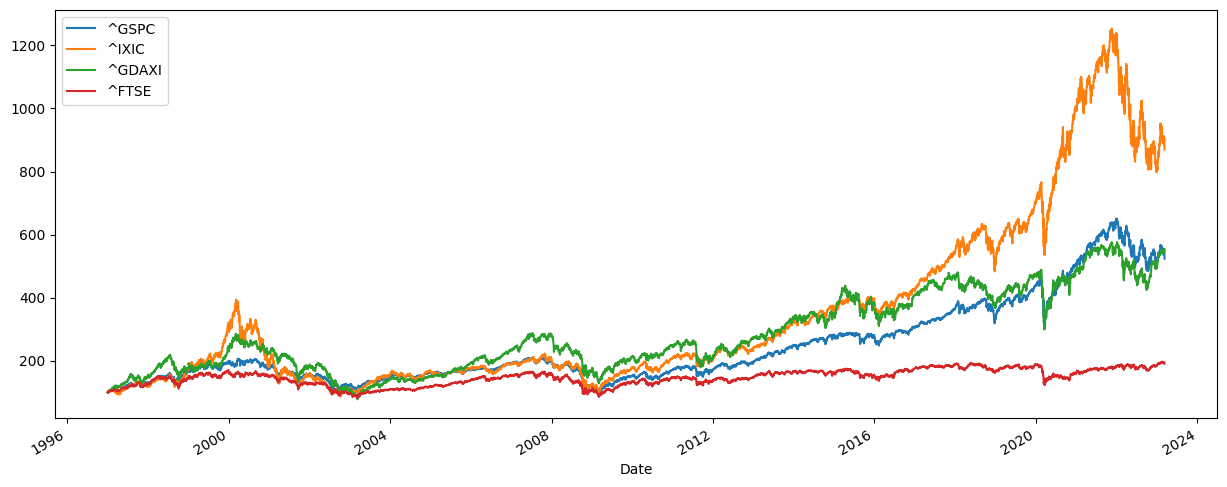

In [5]:
(ind_data / ind_data.iloc[0] * 100).plot(figsize=(15, 6))

### Compute returns

**Simple returns**

In [6]:
ind_returns = (ind_data / ind_data.shift(1)) - 1

ind_returns.tail()

,^GSPC,^IXIC,^GDAXI,^FTSE
Date,,,,
2023-03-06,0.000687,-0.001135,0.004827,-0.002177
2023-03-07,-0.015327,-0.012454,-0.006008,-0.001299
2023-03-08,0.001415,0.003961,0.004649,0.001313
2023-03-09,-0.018459,-0.020530,0.000086,-0.006293
2023-03-10,-0.014478,-0.017592,-0.013128,-0.016701


In [7]:
annual_ind_returns = ind_returns.mean() * 250
annual_ind_returns

^GSPC     0.082167
^IXIC     0.113907
^GDAXI    0.077362
^FTSE     0.039028
dtype: float64

### Comparing a company's performance against an index

In [8]:
tickers = ['PG', '^GSPC', '^DJI']

data_2 = pd.DataFrame()

for t in tickers:
    data_2[t] = wb.DataReader(t, start=datetime(2007, 1, 1))['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [9]:
data_2.tail()

,PG,^GSPC,^DJI
Date,,,
2023-03-06,140.350006,4048.419922,33431.441406
2023-03-07,137.559998,3986.370117,32856.460938
2023-03-08,137.580002,3992.010010,32798.398438
2023-03-09,136.570007,3918.320068,32254.859375
2023-03-10,137.190002,3861.590088,31909.640625


<Axes: xlabel='Date'>

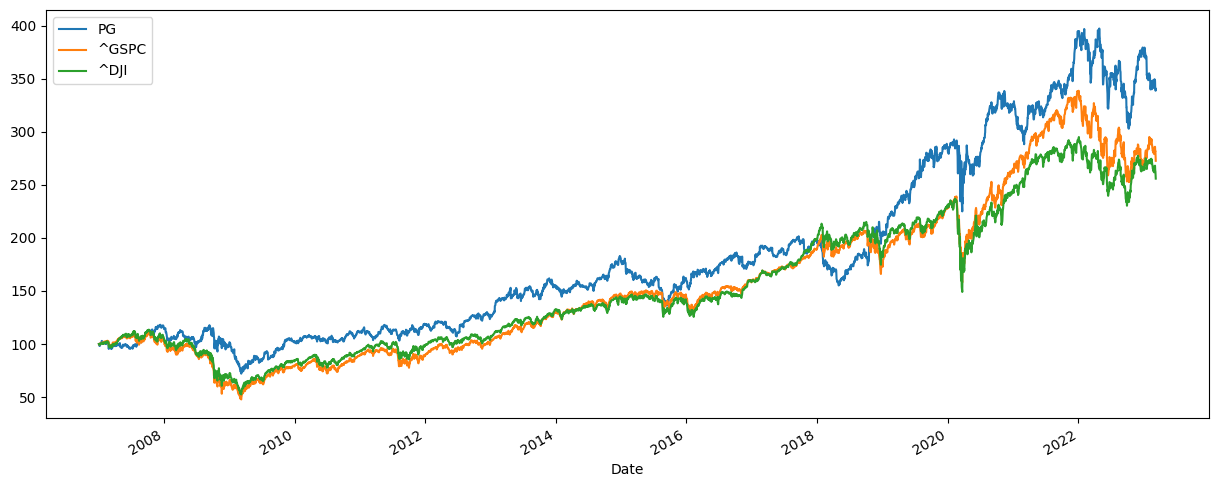

In [10]:
def normalize_100(df):
    return (df / df.iloc[0]) * 100

normalize_100(data_2).plot(figsize=(15, 6))